# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset** :  
   Dataset diperoleh dari sumber Kaggle https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
2. **Tentang Dataset** :
   - Dataset terdiri dari 1000 entri dengan 8 kolom.
   - Tidak ada nilai yang hilang (missing values) dalam dataset ini.
   - Kolom-kolom dalam dataset :
        - gender (kategori): Jenis kelamin siswa (male/female).

        - race/ethnicity (kategori): Kelompok etnis siswa (group A - E).

        - parental level of education (kategori): Tingkat pendidikan orang tua.

        - lunch (kategori): Jenis makan siang yang diterima siswa (standard/free or reduced).

        - test preparation course (kategori): Apakah siswa telah menyelesaikan kursus persiapan ujian (none/completed).

        - math score (numerik): Nilai ujian matematika.

        - reading score (numerik): Nilai ujian membaca.

        - writing score (numerik): Nilai ujian menulis.

3. **Tujuan** :  
   Tujuan pengolahan dataset ini adalah untuk menganalisis faktor-faktor yang memengaruhi performa akademik siswa dalam ujian.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [108]:
df = pd.read_csv('https://raw.githubusercontent.com/sendy-ty/Submission-2/refs/heads/main/dataset/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, kita akan melakukan Exploratory Data Analysis (EDA) untuk memahami faktor-faktor yang memengaruhi performa akademik siswa dalam ujian berdasarkan gender, etnis, tingkat pendidikan orang tua, jenis makan siang, serta kursus persiapan ujian.

EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Meninjau jumlah siswa dan jumlah fitur yang tersedia dalam dataset.
  -  Mengidentifikasi jenis data di setiap kolom (numerik atau kategorikal).   
  - Memeriksa apakah terdapat nilai yang tidak sesuai atau anomali.

2. **Menangani Data yang Hilang**  
   - Mengidentifikasi apakah ada nilai yang hilang (missing values) dalam dataset.
   - Menentukan langkah-langkah untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Menganalisis distribusi nilai ujian (matematika, membaca, menulis) menggunakan statistik deskriptif dan visualisasi seperti histogram atau boxplot.
   - Memeriksa hubungan antara faktor sosial seperti gender, pendidikan orang tua, dan kursus persiapan dengan hasil ujian menggunakan perbandingan rata-rata dan uji korelasi.
   - Menganalisis keterkaitan antara nilai matematika, membaca, dan menulis menggunakan heatmap korelasi.

4. **Visualisasi Data**  
   - Membuat grafik distribusi nilai berdasarkan faktor seperti gender, tingkat pendidikan orang tua, dan kursus persiapan ujian.
   - Menggunakan boxplot untuk melihat sebaran nilai berdasarkan kategori tertentu.
   - Membuat heatmap atau scatter plot untuk memahami hubungan antar nilai ujian.

Tujuan dari EDA adalah untuk memperoleh wawasan mendalam mengenai pola performa akademik siswa dan menentukan faktor utama yang berpengaruh terhadap nilai ujian mereka.

**1. Memahami Struktur Data**

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [110]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [111]:
# Cek data duplikat
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


**2.Menangani Data yang Hilang**

In [112]:
# Cek missing values
print("\nMissing values per fitur:")
print(df.isnull().sum())


Missing values per fitur:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


**Insight:**
- Tidak Ada Nilai Hilang: Semua kolom memiliki data lengkap tanpa missing values.
- Tipe Data Beragam: Terdapat kolom kategorikal (objek) dan numerik (integer), memungkinkan analisis statistik.
- Analisis Kategorikal: Dataset mendukung analisis perbandingan antara gender dan kelompok etnis dalam nilai akademik.

**3. Analisis Distribusi dan Korelasi**

In [113]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [114]:
# Hapus kolom 'RowNumber', 'CustomerId', dan 'Surname' jika ada
data = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], errors='ignore')

# Tampilkan DataFrame untuk memastikan kolom telah dihapus
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


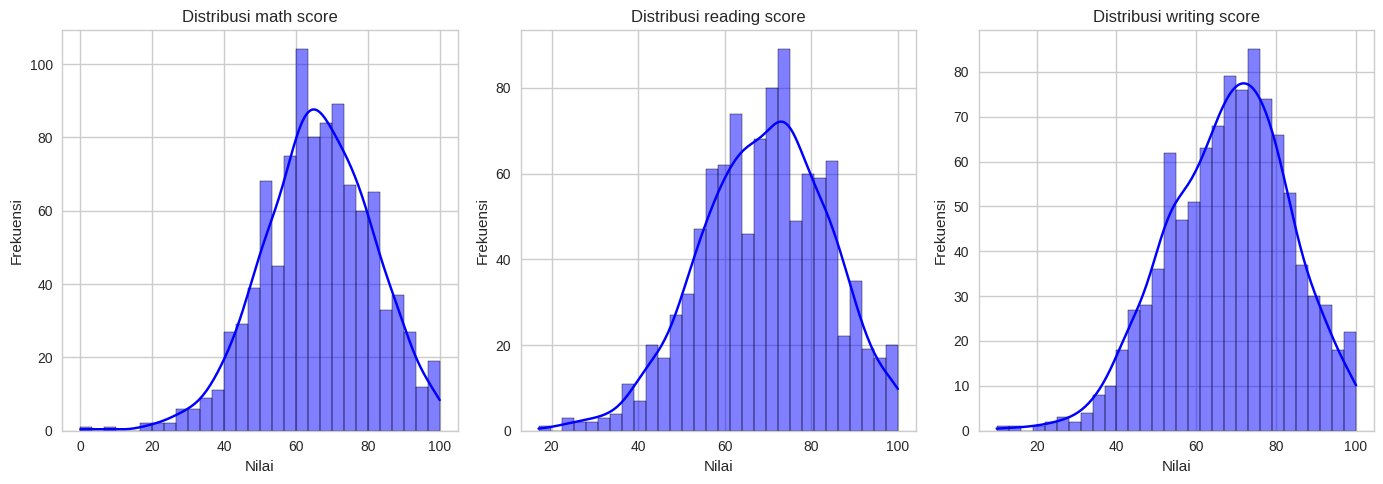

In [115]:
# Memilih fitur numerik (nilai ujian)
num_features = df[['math score', 'reading score', 'writing score']]

# Plot distribusi nilai ujian
plt.figure(figsize=(14, 5))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
    plt.xlabel("Nilai")
    plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

**Insight:**

**1. Distribusi Nilai Ujian:**
  - **Math Score**: Nilai matematika memiliki distribusi yang cenderung normal dengan puncak di sekitar nilai 65-70. Terdapat siswa yang mendapatkan nilai sangat rendah (0) yang bisa menjadi outlier.
  - **Reading Score**: Nilai membaca memiliki distribusi yang lebih simetris dan cenderung berada pada nilai 60-80.
  - **Writing Score**: Distribusi nilai menulis mirip dengan reading score, menunjukkan bahwa sebagian besar siswa memiliki nilai antara 60-80.

**2. Korelasi Antar Nilai Ujian:**
  - Terdapat korelasi positif yang kuat antara math score, reading score, dan writing score, yang berarti siswa dengan nilai tinggi di satu mata pelajaran cenderung memiliki nilai tinggi di mata pelajaran lainnya.
  - Korelasi antara reading score dan writing score lebih kuat dibandingkan dengan math score, yang mungkin menunjukkan bahwa keterampilan membaca berkontribusi lebih besar terhadap keterampilan menulis.

**4. Visualisasi Data**

<ipython-input-116-e7dfb19adb11>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
<ipython-input-116-e7dfb19adb11>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
<ipython-input-116-e7dfb19adb11>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
<ipython-input-116-e7dfb19adb11>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False`

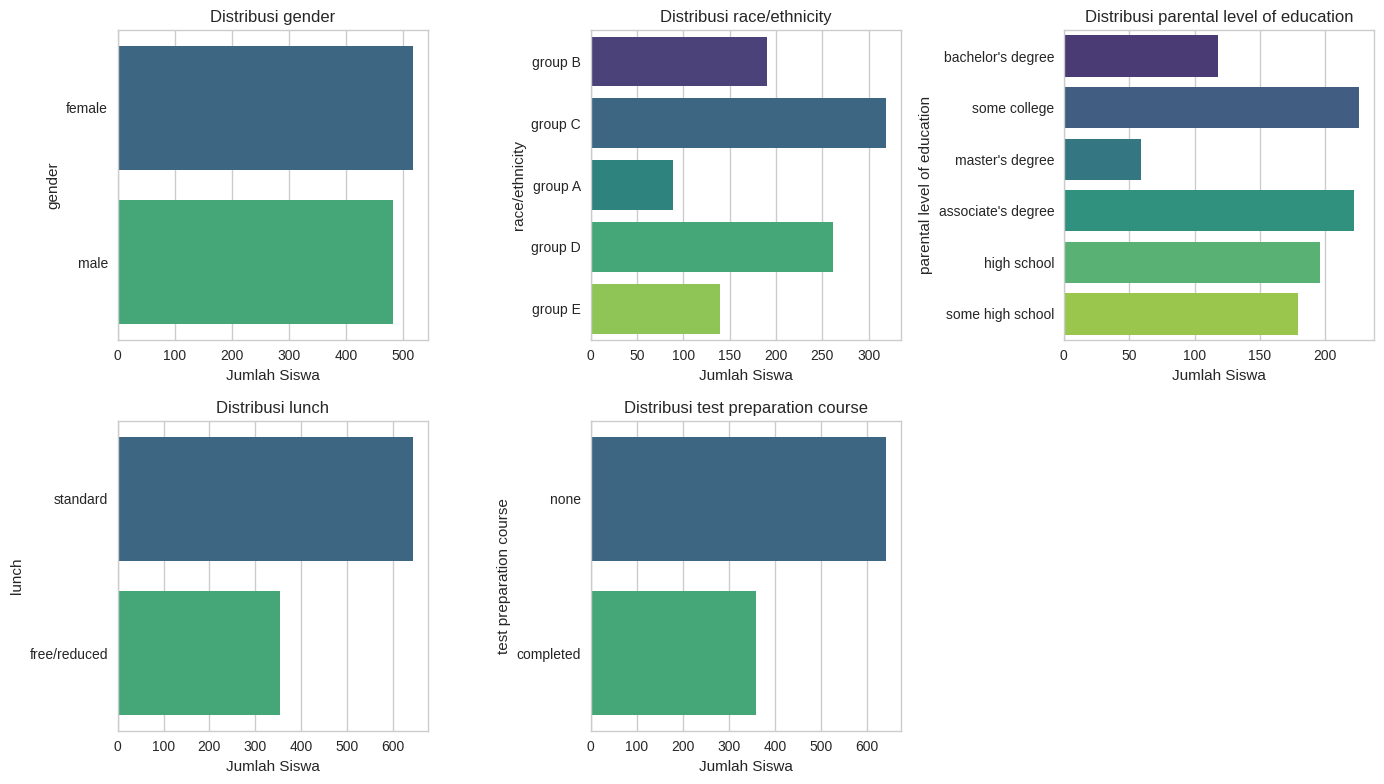

In [116]:
# Memilih fitur kategorikal yang relevan
cat_features = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]

# Plot distribusi fitur kategorikal
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Distribusi {column}')
    plt.xlabel("Jumlah Siswa")
    plt.ylabel(column)
plt.tight_layout()
plt.show()

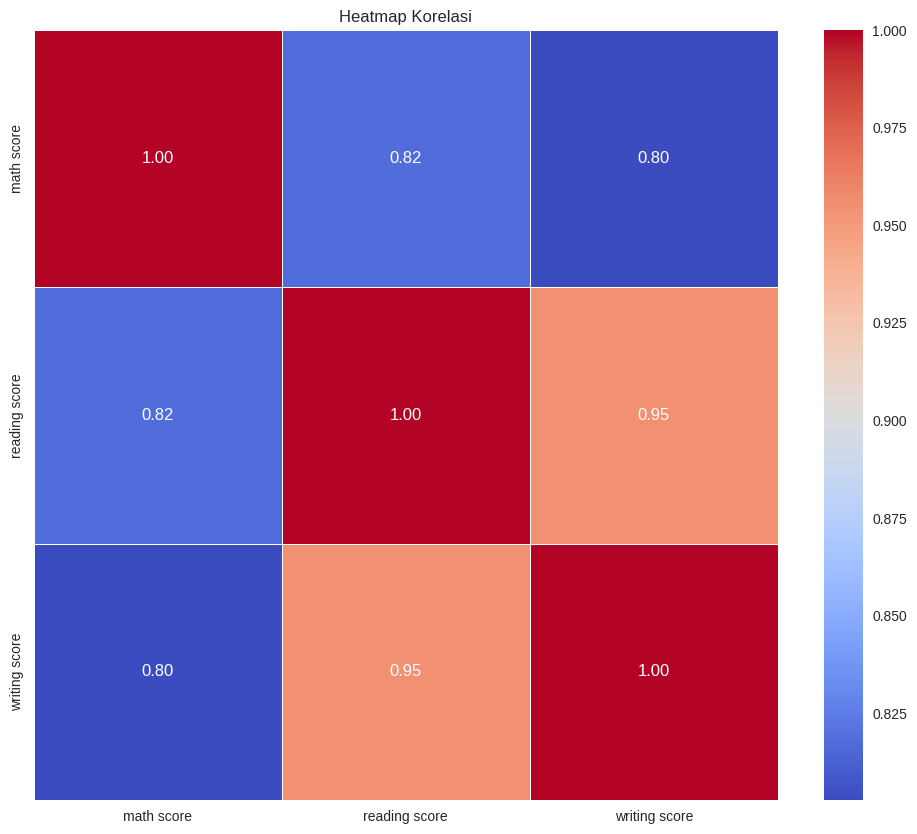

In [117]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

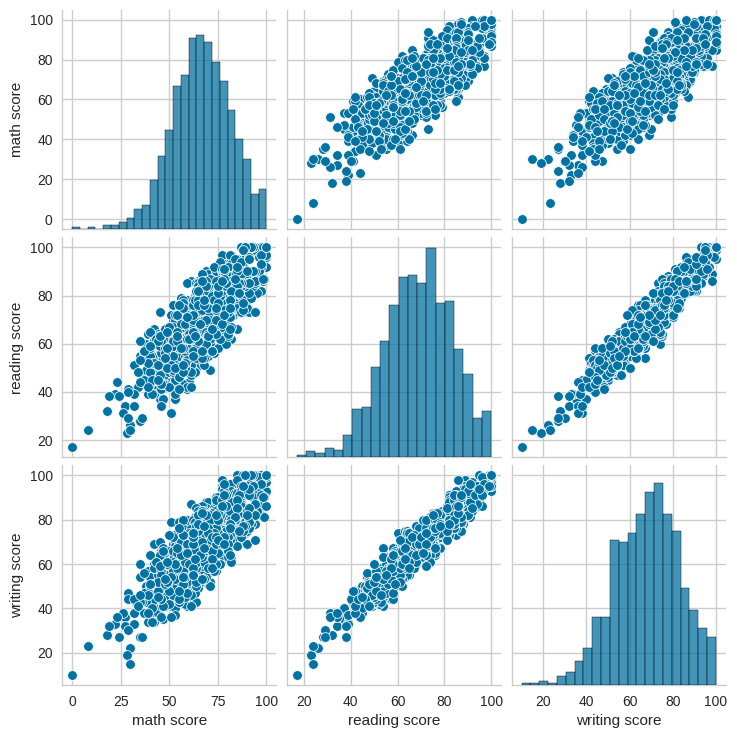

In [118]:
# Pairplot untuk fitur numerik
sns.pairplot(num_features)
plt.show()

**Insight:**

**1. Distribusi Kategori Siswa**: Siswa perempuan lebih banyak daripada laki-laki. Kelompok ras C dan D paling dominan, sementara kelompok A terkecil. Mayoritas orang tua berpendidikan SMA/kuliah, siswa umumnya dapat makan siang standar, dan sedikit yang mengikuti kursus persiapan ujian.

**2. Korelasi antara Skor Akademik**: Heatmap menunjukkan korelasi kuat antarSkor (membaca, menulis, matematika). Skor membaca-menulis paling tinggi (0.95), matematika juga berkorelasi signifikan (0.80-0.82), mengindikasikan kemampuan akademik siswa saling terkait.

**3. Distribusi dan Hubungan Skor Akademik**: Skor akademik berdistribusi normal, mayoritas di kisaran menengah-tinggi. Hubungan antarSkor linear, menandakan siswa dengan kemampuan tinggi di satu bidang cenderung unggul di bidang lainnya.

In [119]:
# Menambahkan kolom average score
df["average score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [120]:
df["Rata-rata Nilai"] = df[["math score", "reading score", "writing score"]].mean(axis=1)
df["Lulus"] = df["Rata-rata Nilai"] >= 60
print(df["Lulus"].value_counts())

Lulus
True     715
False    285
Name: count, dtype: int64


Dari hasil analisis data diatas menunjukkan bahwa penambahan kolom average score memberikan rata-rata nilai dari tiga mata pelajaran, digunakan untuk menentukan kelulusan dengan batas nilai 60. Dari evaluasi, 715 siswa (71.5%) lulus dan 285 siswa (28.5%) tidak lulus. Ini menunjukkan sebagian besar siswa memiliki nilai di atas 60, meskipun masih ada yang di bawah standar. Informasi ini dapat digunakan untuk menganalisis faktor-faktor yang mempengaruhi performa siswa.

# **Explore math score**

<ipython-input-121-27635ffade1c>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  p = sns.histplot(data=df, x="math score", kde=True, palette="viridis")


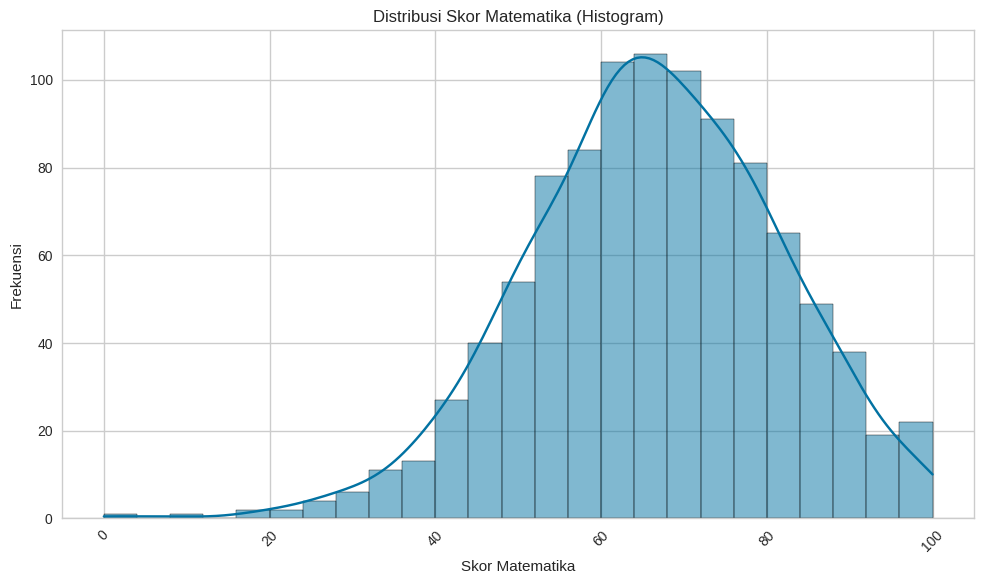

In [121]:
plt.figure(figsize=(10, 6))
p = sns.histplot(data=df, x="math score", kde=True, palette="viridis")
plt.title("Distribusi Skor Matematika (Histogram)")
plt.xlabel("Skor Matematika")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [122]:
# Membuat kolom Math_PassStatus dengan kriteria lulus jika skor matematika >= 60
df['Math_PassStatus'] = df['math score'].apply(lambda x: 'Lulus' if x >= 60 else 'Tidak Lulus')

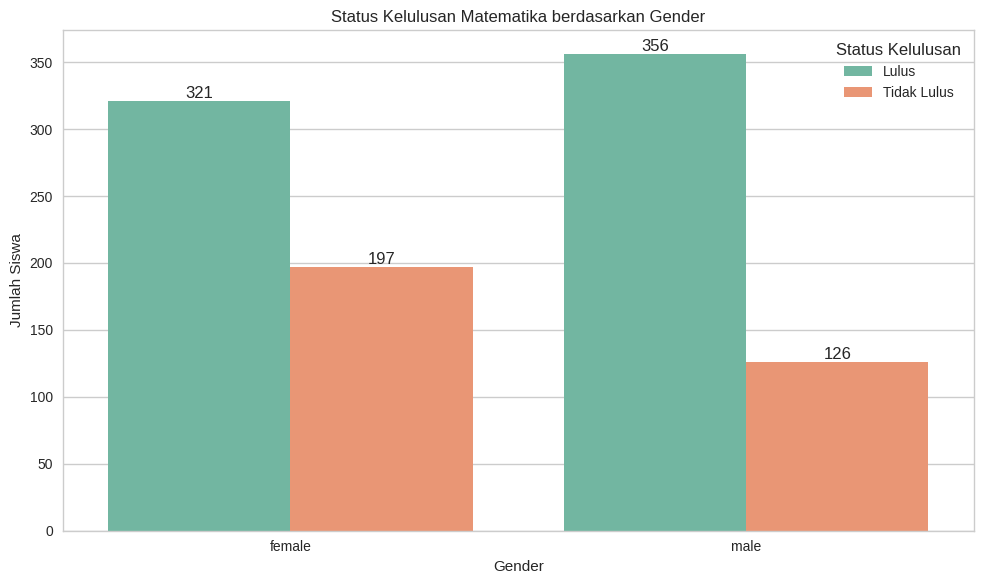

In [123]:
# Grouped Bar Plot dengan Rasio Persentase
plt.figure(figsize=(10, 6))
custom_colors = ['#59c3c3', '#f48c4e']
p = sns.countplot(data=df, x='gender', hue='Math_PassStatus', palette='Set2')
plt.title('Status Kelulusan Matematika berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Siswa')
plt.legend(title='Status Kelulusan', loc='upper right')

# Menambahkan label jumlah di atas bar
for container in p.containers:
    p.bar_label(container)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

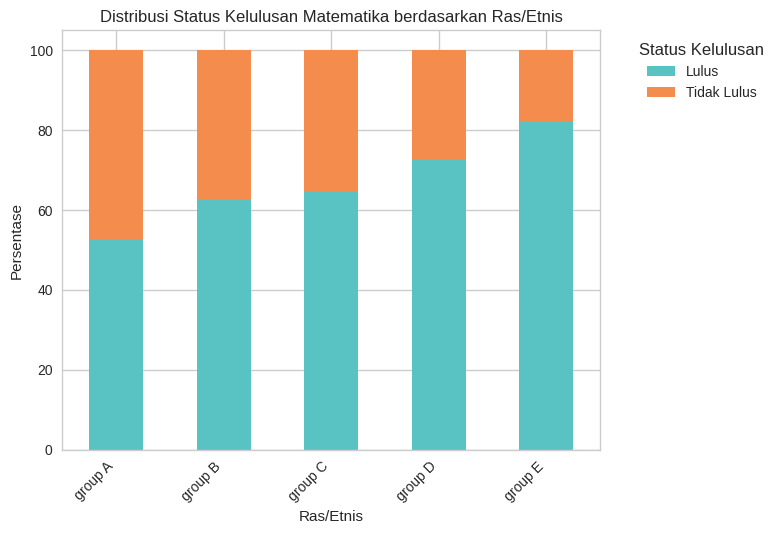

In [124]:
# Hitung persentase status kelulusan untuk setiap kelompok
plt.figure(figsize=(12, 6))
race_pass_percentages = df.groupby(['race/ethnicity', 'Math_PassStatus']).size().unstack(fill_value=0)
race_pass_percentages_norm = race_pass_percentages.apply(lambda x: x / x.sum() * 100, axis=1)
race_pass_percentages_norm.plot(kind='bar', stacked=True, color=custom_colors)

plt.title('Distribusi Status Kelulusan Matematika berdasarkan Ras/Etnis')
plt.xlabel('Ras/Etnis')
plt.ylabel('Persentase')
plt.legend(title='Status Kelulusan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

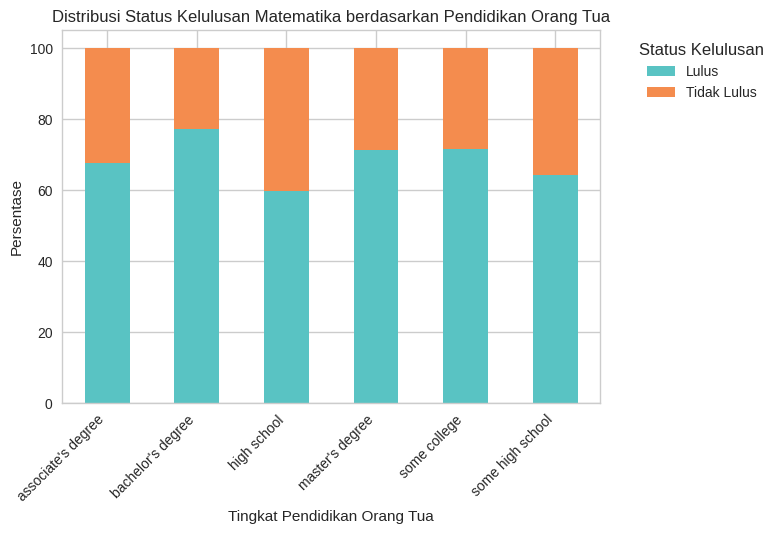

In [125]:
# Hitung persentase status kelulusan untuk setiap tingkat pendidikan orang tua
plt.figure(figsize=(14, 7))
parent_edu_pass_percentages = df.groupby(['parental level of education', 'Math_PassStatus']).size().unstack(fill_value=0)
parent_edu_pass_percentages_norm = parent_edu_pass_percentages.apply(lambda x: x / x.sum() * 100, axis=1)
parent_edu_pass_percentages_norm.plot(kind='bar', stacked=True, color=custom_colors)

plt.title('Distribusi Status Kelulusan Matematika berdasarkan Pendidikan Orang Tua')
plt.xlabel('Tingkat Pendidikan Orang Tua')
plt.ylabel('Persentase')
plt.legend(title='Status Kelulusan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

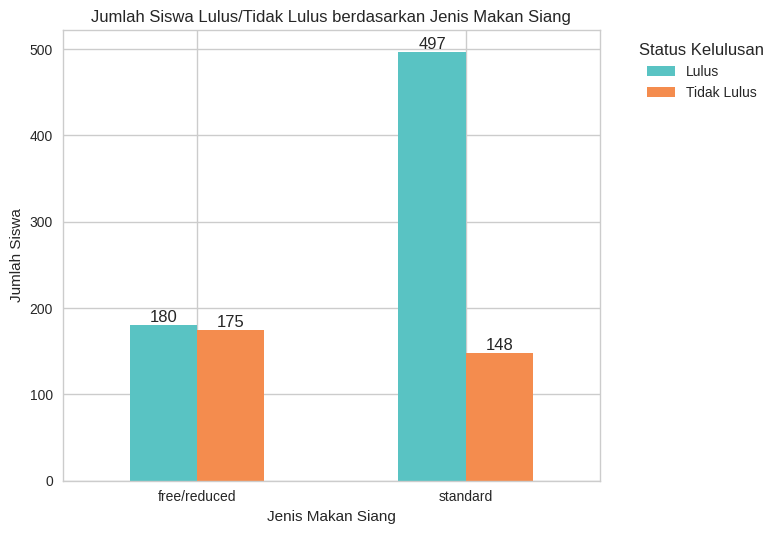

In [126]:
plt.figure(figsize=(10, 6))
lunch_pass_grouped = df.groupby(['lunch', 'Math_PassStatus']).size().unstack(fill_value=0)
lunch_pass_grouped.plot(kind='bar', color=custom_colors)

plt.title('Jumlah Siswa Lulus/Tidak Lulus berdasarkan Jenis Makan Siang')
plt.xlabel('Jenis Makan Siang')
plt.ylabel('Jumlah Siswa')
plt.legend(title='Status Kelulusan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# Menambahkan label jumlah di atas setiap bar
for c in plt.gca().containers:
    plt.gca().bar_label(c, label_type='edge')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

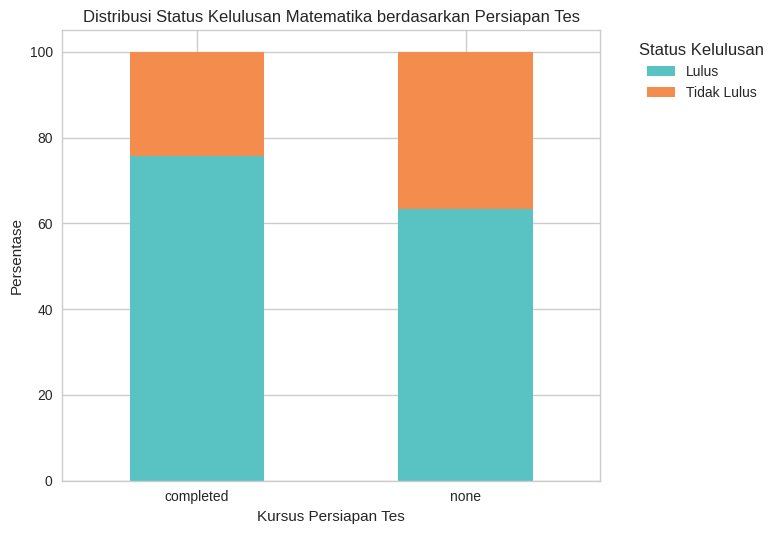

In [127]:
# Hitung persentase status kelulusan untuk setiap kategori persiapan tes
plt.figure(figsize=(10, 6))
test_prep_pass_percentages = df.groupby(['test preparation course', 'Math_PassStatus']).size().unstack(fill_value=0)
test_prep_pass_percentages_norm = test_prep_pass_percentages.apply(lambda x: x / x.sum() * 100, axis=1)
test_prep_pass_percentages_norm.plot(kind='bar', stacked=True, color=custom_colors)

plt.title('Distribusi Status Kelulusan Matematika berdasarkan Persiapan Tes')
plt.xlabel('Kursus Persiapan Tes')
plt.ylabel('Persentase')
plt.legend(title='Status Kelulusan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Insight:**

- Distribusi Skor Matematika: Skor matematika cenderung terdistribusi normal, dengan mayoritas siswa mendapatkan nilai antara 60-80.
- Kelulusan Berdasarkan Gender: Lebih banyak siswa laki-laki yang lulus (356) dibandingkan siswa perempuan (321), meskipun proporsi perempuan yang tidak lulus juga signifikan.
- Kelulusan Berdasarkan Ras/Etnis: Semua kelompok ras/etnis menunjukkan variasi dalam tingkat kelulusan, dengan beberapa kelompok memiliki persentase lulus yang lebih tinggi.
- Pengaruh Pendidikan Orang Tua: Siswa dengan orang tua berpendidikan lebih tinggi memiliki tingkat kelulusan yang lebih baik dibandingkan siswa dari latar belakang pendidikan yang lebih rendah.
- Kursus Persiapan Tes: Siswa yang mengikuti kursus persiapan tes memiliki tingkat kelulusan yang jauh lebih tinggi dibandingkan yang tidak mengikuti.
- Jenis Makan Siang: Siswa yang mendapatkan makan siang standar menunjukkan angka kelulusan yang lebih tinggi dibandingkan yang mendapatkan makan siang gratis/rendah.


# **Explore reading score**

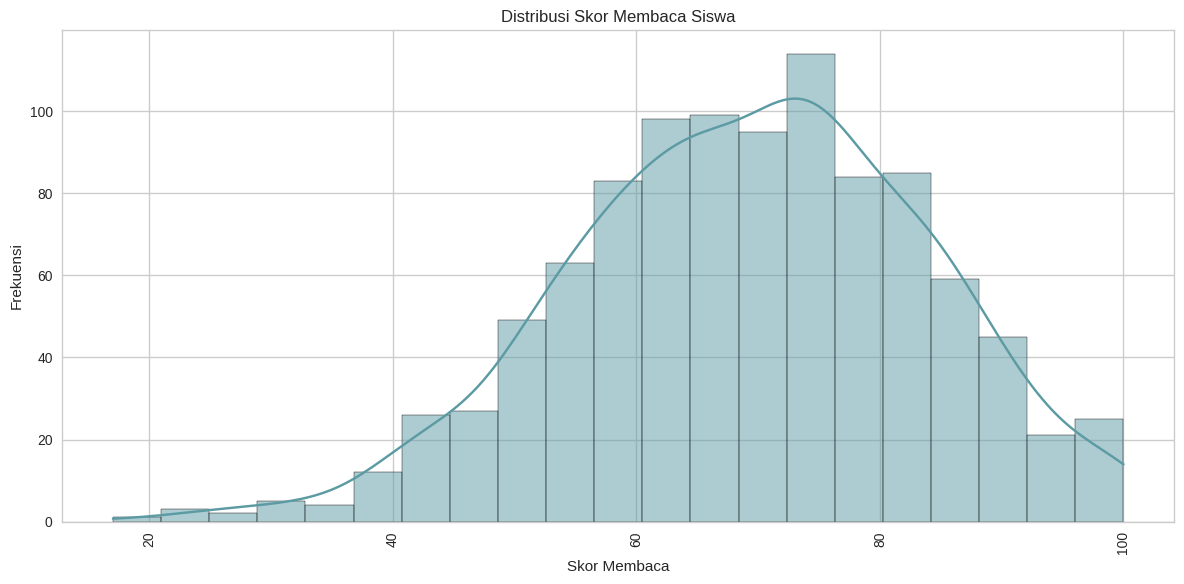

In [128]:
# Menampilkan reading score
plt.figure(figsize=(12, 6))
p = sns.histplot(data=df, x="reading score", kde=True, color='#5D9BA4')
plt.title('Distribusi Skor Membaca Siswa')
plt.xlabel('Skor Membaca')
plt.ylabel('Frekuensi')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-129-4ad16709cfbe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Reading_PassStatus', data=df, palette=custom_colors)


<Figure size 1000x600 with 0 Axes>

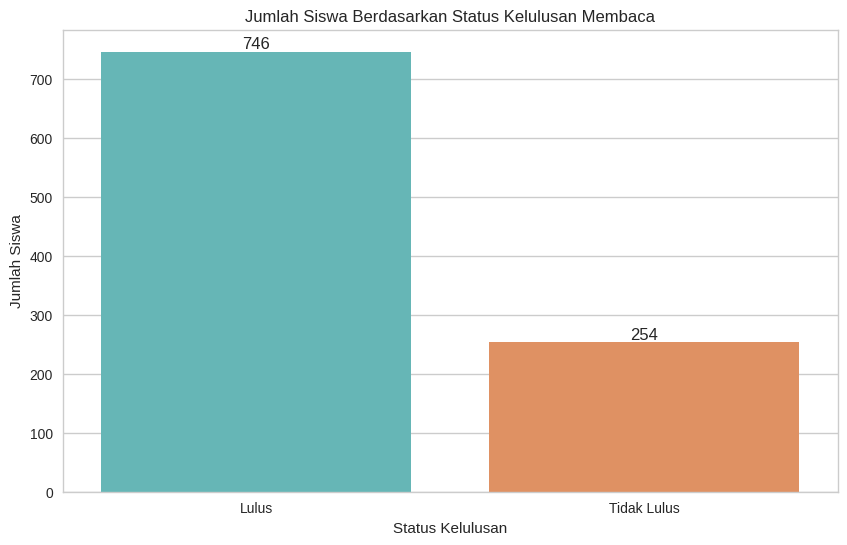

In [129]:
#menghitung jumlah siswa dengan status kelulusan membaca
pass_score = 60 #skor kelulusan
df['Reading_PassStatus'] = np.where(df['reading score'] >= pass_score, 'Lulus', 'Tidak Lulus')
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
sns.countplot(x='Reading_PassStatus', data=df, palette=custom_colors)
plt.title('Jumlah Siswa Berdasarkan Status Kelulusan Membaca')
plt.xlabel('Status Kelulusan')
plt.ylabel('Jumlah Siswa')

# Menambahkan label jumlah di atas setiap bar
for container in plt.gca().containers:
    plt.gca().bar_label(container)

plt.show()

In [130]:
# Hitung jumlah masing-masing kategori
count_values = df['Reading_PassStatus'].value_counts()
prop_values = df['Reading_PassStatus'].value_counts(normalize=True).map('{:.2%}'.format)

# Gabungkan hasil dalam satu DataFrame
result_df = pd.DataFrame({'Jumlah': count_values, 'Proporsi': prop_values})
print(result_df)

                    Jumlah Proporsi
Reading_PassStatus                 
Lulus                  746   74.60%
Tidak Lulus            254   25.40%


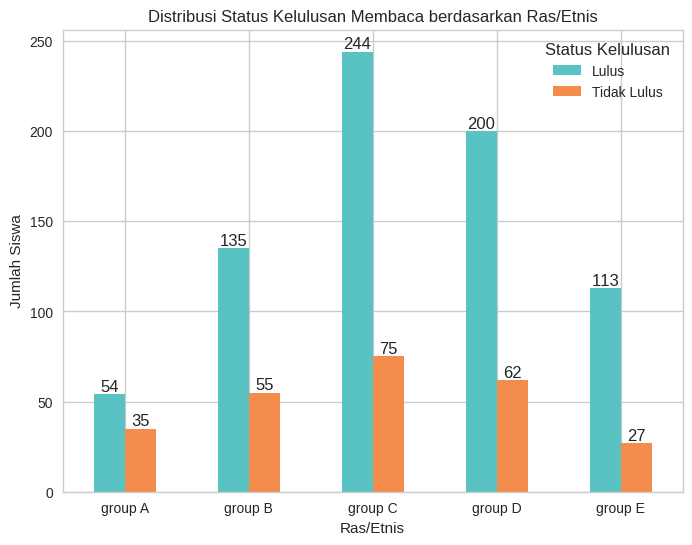

In [131]:
# Membuat diagram batang untuk melihat hubungan antara ras/etnis dengan status kelulusan membaca
plot = df.groupby(['race/ethnicity', 'Reading_PassStatus']).size().unstack().plot(
    kind='bar', color=custom_colors, figsize=(8, 6))
for bar_container in plot.containers:
    plot.bar_label(bar_container, label_type='edge')

plt.xlabel("Ras/Etnis")
plt.ylabel("Jumlah Siswa")
plt.title("Distribusi Status Kelulusan Membaca berdasarkan Ras/Etnis")
plt.xticks(rotation=0)
plt.legend(title="Status Kelulusan")
plt.show()

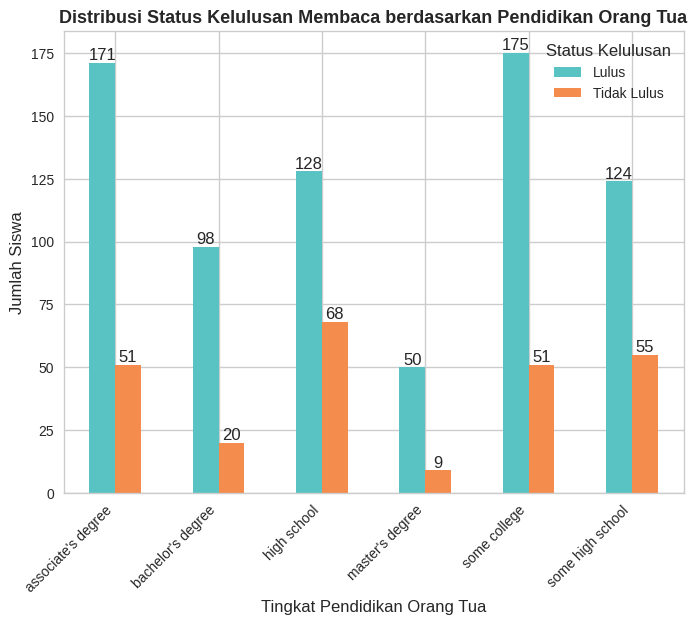

In [132]:
# Membuat diagram batang untuk menganalisis hubungan tingkat pendidikan orang tua dengan status kelulusan membaca
plot = df.groupby(['parental level of education', 'Reading_PassStatus']).size().unstack().plot(
    kind='bar', color=custom_colors, figsize=(8, 6))
for bar_container in plot.containers:
    plot.bar_label(bar_container, label_type='edge')
plt.xlabel("Tingkat Pendidikan Orang Tua", fontsize=12)
plt.ylabel("Jumlah Siswa", fontsize=12)
plt.title("Distribusi Status Kelulusan Membaca berdasarkan Pendidikan Orang Tua", fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title="Status Kelulusan", fontsize=10)
plt.show()

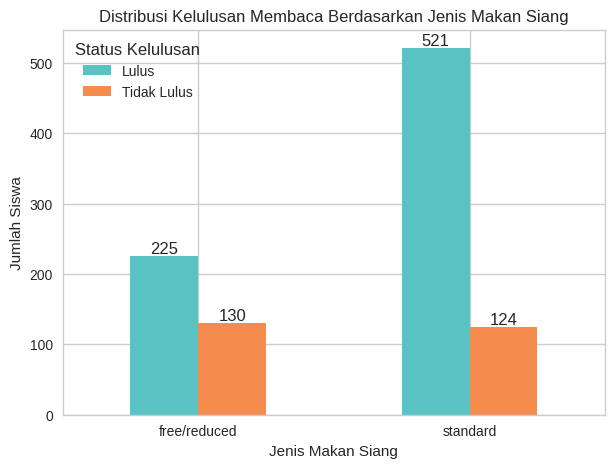

In [133]:
# Membuat diagram batang untuk hubungan antara jenis makan siang dan status kelulusan membaca
plot = df.groupby(['lunch', 'Reading_PassStatus']).size().unstack().plot(
    kind='bar', color=custom_colors, figsize=(7, 5))
for bar_container in plot.containers:
    plot.bar_label(bar_container, label_type='edge')
plt.xlabel("Jenis Makan Siang")
plt.ylabel("Jumlah Siswa")
plt.title("Distribusi Kelulusan Membaca Berdasarkan Jenis Makan Siang")
plt.xticks(rotation=0)
plt.legend(title="Status Kelulusan")
plt.show()

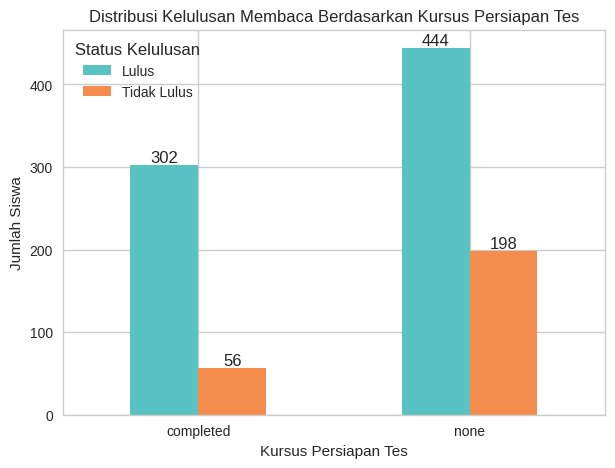

In [134]:
# Membuat diagram batang untuk hubungan antara kursus persiapan tes dan status kelulusan membaca
plot = df.groupby(['test preparation course', 'Reading_PassStatus']).size().unstack().plot(
    kind='bar', color=custom_colors, figsize=(7, 5))
for bar_container in plot.containers:
    plot.bar_label(bar_container, label_type='edge')
plt.xlabel("Kursus Persiapan Tes")
plt.ylabel("Jumlah Siswa")
plt.title("Distribusi Kelulusan Membaca Berdasarkan Kursus Persiapan Tes")
plt.xticks(rotation=0)
plt.legend(title="Status Kelulusan")
plt.show()

**Insight:**

- Distribusi Skor: Skor membaca menunjukkan distribusi normal, dengan banyak siswa memperoleh nilai antara 60-80.
- Kelulusan Gender: Siswa perempuan memiliki angka kelulusan yang lebih tinggi dibandingkan siswa laki-laki.
- Kelulusan Ras/Etnis: Terdapat variasi signifikan dalam tingkat kelulusan antar kelompok ras/etnis.
- Pengaruh Pendidikan Orang Tua: Siswa dengan orang tua berpendidikan lebih tinggi cenderung lulus lebih baik dalam membaca.
- Kursus Persiapan: Siswa yang mengikuti kursus persiapan tes memiliki tingkat kelulusan yang lebih tinggi dibandingkan yang tidak.

# **Explore writing score**

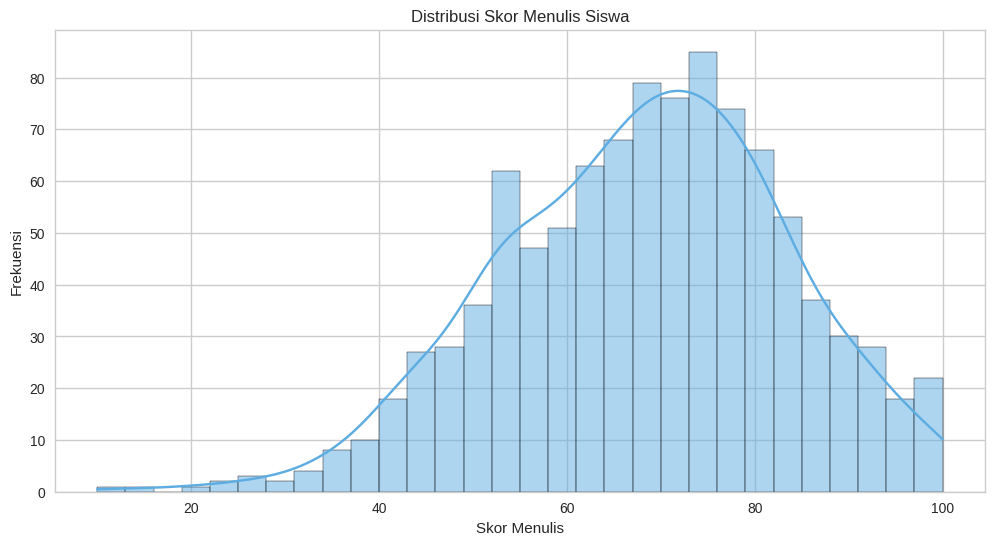

In [135]:
# menampilkan data writing score
plt.figure(figsize=(12, 6))
sns.histplot(df['writing score'], bins=30, kde=True, color='#5DADE2', alpha=0.5)
plt.title("Distribusi Skor Menulis Siswa")
plt.xlabel("Skor Menulis")
plt.ylabel("Frekuensi")
plt.show()

In [136]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average score', 'Rata-rata Nilai', 'Lulus',
       'Math_PassStatus', 'Reading_PassStatus'],
      dtype='object')


In [137]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   average score  Rata-rata Nilai  Lulus Math_PassStatus Reading_PassStatus  
0      72.666667        72.666667   True           Lulus              Lulu

<ipython-input-138-566c9abba7d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(x='Lulus', data=df, palette='Set2')


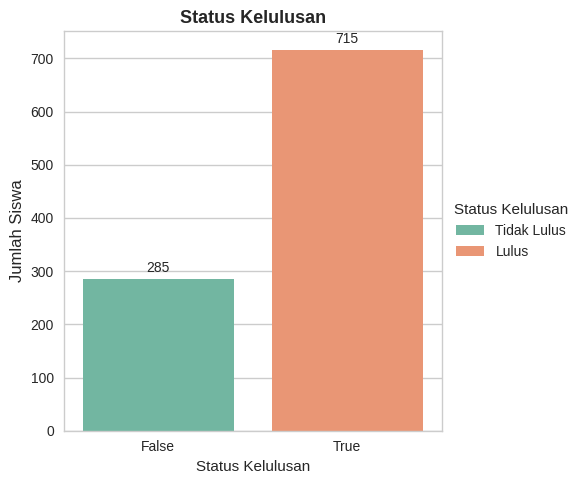

In [138]:
# Membuat diagram batang untuk melihat hubungan gender dengan Writing_PassStatus
plt.figure(figsize=(6, 5))
p = sns.countplot(x='Lulus', data=df, palette='Set2')
for container in p.containers:
    p.bar_label(container, fmt='%d', fontsize=10, padding=3)
plt.title("Status Kelulusan", fontsize=13, fontweight='bold')
plt.xlabel("Status Kelulusan", fontsize=11)
plt.ylabel("Jumlah Siswa", fontsize=12)
legend_labels = ['Tidak Lulus', 'Lulus']
plt.legend(title="Status Kelulusan", labels=legend_labels,
           fontsize=10, title_fontsize=11,
           loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [139]:
# Menghitung jumlah murid yang lulus dan tidak lulus untuk math score
df['Writing_PassStatus'] = np.where(df['writing score']<pass_score, 'F', 'P')
df.Writing_PassStatus.value_counts()

,count
Writing_PassStatus,
P,719
F,281


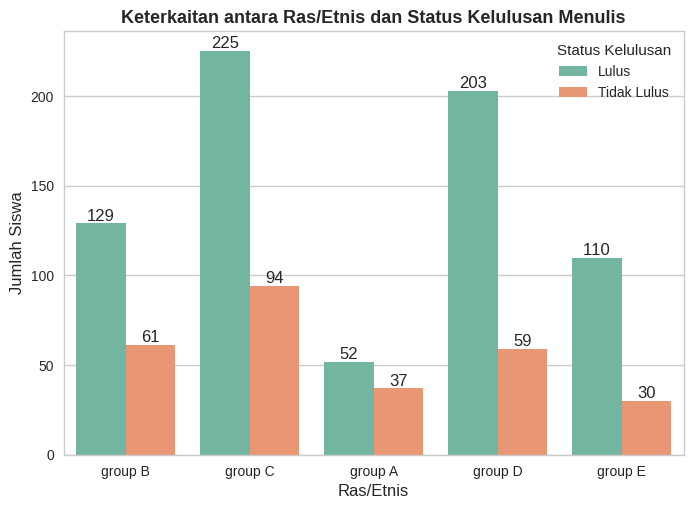

In [140]:
# Mengamati keterkaitan antara ras/etnis dengan status kelulusan menulis
df['Writing_PassStatus'] = df['Writing_PassStatus'].replace({'P': 'Lulus', 'F': 'Tidak Lulus'})

# Mengamati keterkaitan antara ras/etnis dengan status kelulusan menulis
grafik = sns.countplot(x='race/ethnicity', data=df, hue='Writing_PassStatus', palette='Set2')
plt.setp(grafik.get_xticklabels(), rotation=0)

# Menambahkan label pada setiap batang
for bar in grafik.containers:
    grafik.bar_label(bar, label_type='edge')

# Menampilkan grafik
plt.title("Keterkaitan antara Ras/Etnis dan Status Kelulusan Menulis", fontsize=13, fontweight='bold')
plt.xlabel("Ras/Etnis", fontsize=12)
plt.ylabel("Jumlah Siswa", fontsize=12)
plt.legend(title="Status Kelulusan", fontsize=10, title_fontsize=11)

plt.show()

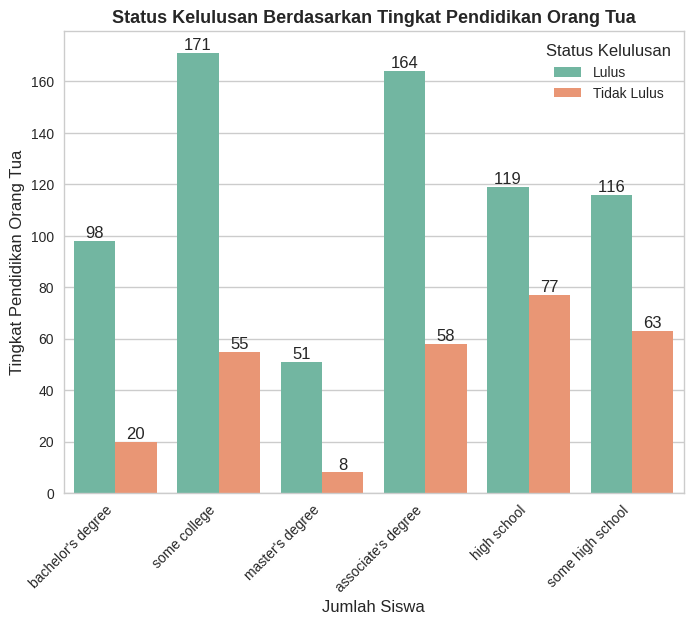

In [141]:
# Membuat visualisasi hubungan antara tingkat pendidikan orang tua dengan status kelulusan menulis
plt.figure(figsize=(8, 6))
p = sns.countplot(x='parental level of education', data=df, hue='Writing_PassStatus', palette='Set2')
for container in p.containers:
    p.bar_label(container, label_type='edge')
plt.title("Status Kelulusan Berdasarkan Tingkat Pendidikan Orang Tua", fontsize=13, fontweight='bold')
plt.xlabel("Jumlah Siswa", fontsize=12)
plt.ylabel("Tingkat Pendidikan Orang Tua", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Status Kelulusan", loc="upper right")
plt.show()

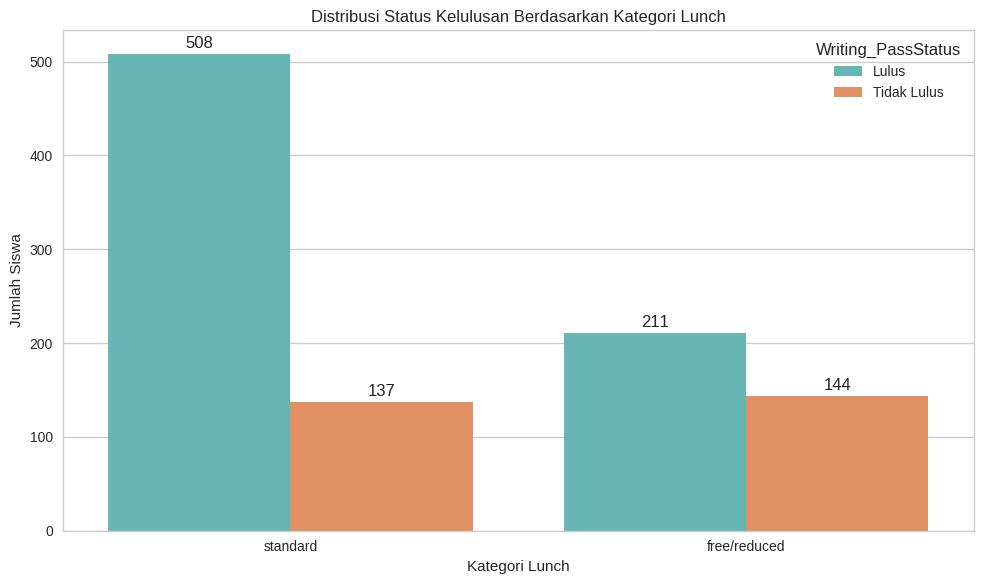

In [142]:
# Visualisasi hubungan antara kategori lunch dengan status kelulusan
plt.figure(figsize=(10, 6))
plot_status = sns.countplot(x='lunch',
                            hue='Writing_PassStatus',
                            data=df,
                            palette=custom_colors)
plt.title('Distribusi Status Kelulusan Berdasarkan Kategori Lunch')
plt.xlabel('Kategori Lunch')
plt.ylabel('Jumlah Siswa')
for kontainer in plot_status.containers:
    plot_status.bar_label(kontainer,
                           label_type='edge',
                           padding=2,
                           fmt='%d')
plt.tight_layout()
plt.show()

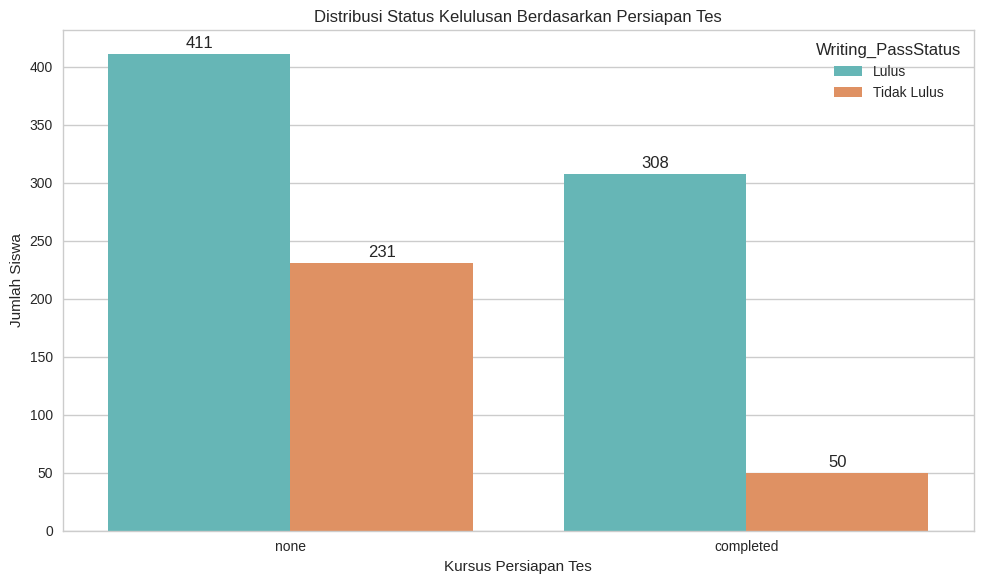

In [143]:
# Visualisasi hubungan antara test preparation course dengan status kelulusan
plt.figure(figsize=(10, 6))
plot_status = sns.countplot(x='test preparation course',
                           hue='Writing_PassStatus',
                           data=df,
                           palette=custom_colors)
plt.title('Distribusi Status Kelulusan Berdasarkan Persiapan Tes')
plt.xlabel('Kursus Persiapan Tes')
plt.ylabel('Jumlah Siswa')
for kontainer in plot_status.containers:
   plot_status.bar_label(kontainer,
                          label_type='edge',
                          padding=2,
                          fmt='%d')

plt.tight_layout()
plt.show()

**Insight:**

- Mayoritas siswa memiliki skor menengah hingga tinggi (70-80), menunjukkan bahwa sebagian besar siswa memiliki kemampuan menulis yang cukup baik.
- Siswa dengan orang tua berpendidikan lebih tinggi (Bachelor’s/Master’s Degree) cenderung lebih banyak yang lulus dibandingkan siswa dengan orang tua berpendidikan rendah.
- Siswa yang mengikuti kursus persiapan tes memiliki tingkat kelulusan lebih tinggi dibandingkan yang tidak mengikuti.
- Siswa dengan lunch standar memiliki tingkat kelulusan lebih tinggi dibandingkan yang menerima free/reduced lunch.
- Etnis C dan D memiliki tingkat kelulusan tertinggi, sedangkan etnis A memiliki jumlah siswa tidak lulus yang lebih banyak dibandingkan kelompok lainnya.

# **Explore average score**

<ipython-input-144-70a58e7fb30b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafik = sns.countplot(x="average score", data=df, palette=custom_colors)
<ipython-input-144-70a58e7fb30b>:3: UserWarning: 
The palette list has fewer values (2) than needed (194) and will cycle, which may produce an uninterpretable plot.
  grafik = sns.countplot(x="average score", data=df, palette=custom_colors)


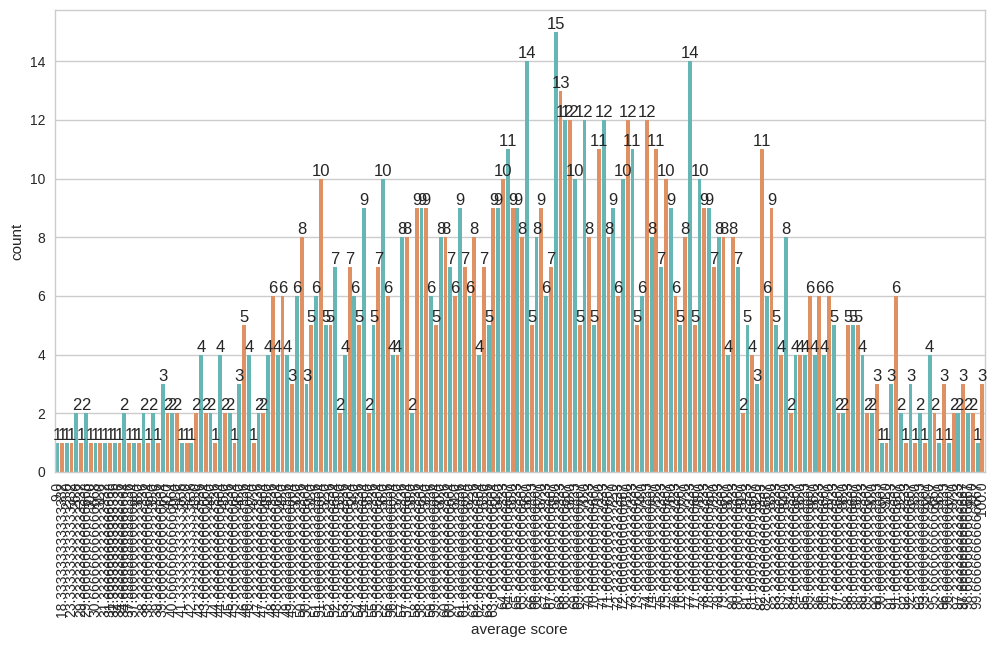

In [144]:
#Menampilkan data average score
plt.figure(figsize=(12, 6))
grafik = sns.countplot(x="average score", data=df, palette=custom_colors)
plt.xticks(rotation=90)
for bar in grafik.containers:
    grafik.bar_label(bar, label_type='edge')
plt.show()

In [145]:
# Menentukan status kelulusan berdasarkan nilai rata-rata siswa
df["Average_PassStatus"] = np.where(df["average score"] < pass_score, "Tidak Lulus", "Lulus")
status_counts = df["Average_PassStatus"].value_counts()
print(status_counts)

Average_PassStatus
Lulus          715
Tidak Lulus    285
Name: count, dtype: int64


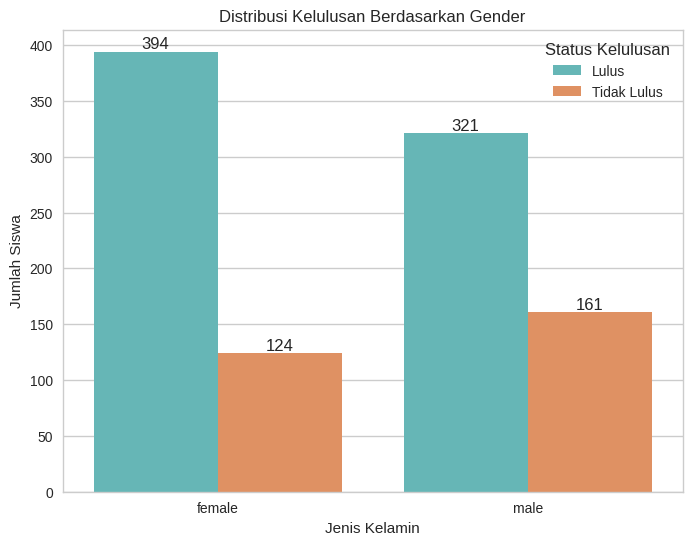

In [146]:
# Distribusi Kelulusan Berdasarkan Gender
plt.figure(figsize=(8, 6))
grafik = sns.countplot(x="gender", data=df, hue="Average_PassStatus", palette=custom_colors)
for bar in grafik.containers:
    grafik.bar_label(bar, label_type="edge")
plt.title("Distribusi Kelulusan Berdasarkan Gender")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Siswa")
plt.legend(title="Status Kelulusan", loc="upper right")
plt.show()

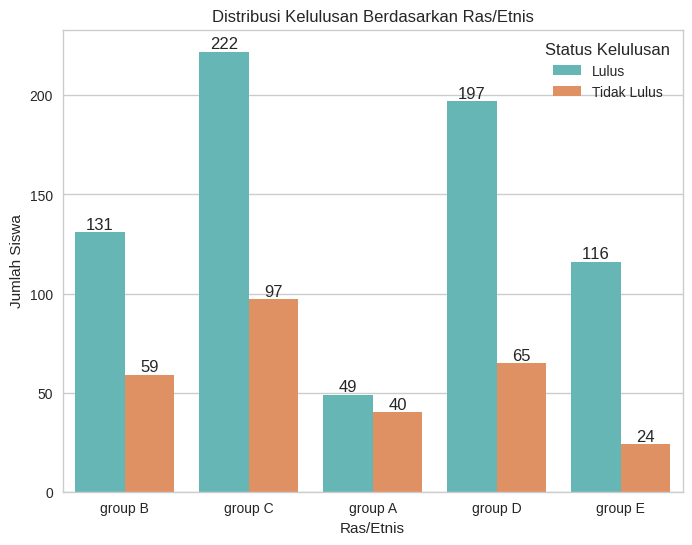

In [147]:
# Membuat visualisasi distribusi kelulusan berdasarkan ras/etnis
plt.figure(figsize=(8, 6))
grafik = sns.countplot(x="race/ethnicity", data=df, hue="Average_PassStatus", palette=custom_colors)
for bar in grafik.containers:
    grafik.bar_label(bar, label_type="edge")
plt.title("Distribusi Kelulusan Berdasarkan Ras/Etnis")
plt.xlabel("Ras/Etnis")
plt.ylabel("Jumlah Siswa")
plt.legend(title="Status Kelulusan", loc="upper right")
plt.show()

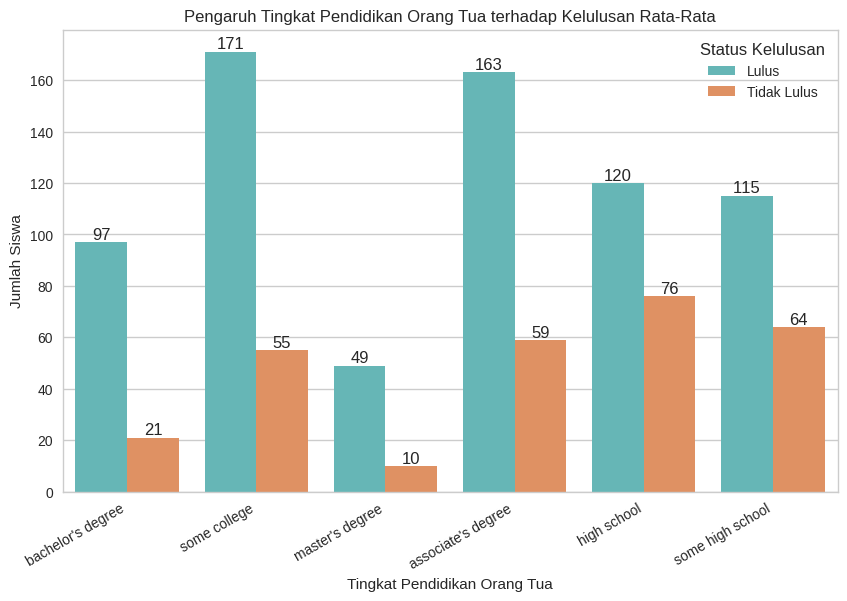

In [148]:
# Hubungan tingkat pendidikan orang tua dengan status kelulusan rata-rata
plt.figure(figsize=(10, 6))
grafik = sns.countplot(x="parental level of education", data=df, hue="Average_PassStatus", palette=custom_colors)
for bar in grafik.containers:
    grafik.bar_label(bar, label_type="edge")
plt.xticks(rotation=30, ha="right")
plt.title("Pengaruh Tingkat Pendidikan Orang Tua terhadap Kelulusan Rata-Rata")
plt.xlabel("Tingkat Pendidikan Orang Tua")
plt.ylabel("Jumlah Siswa")
plt.legend(title="Status Kelulusan", loc="upper right")
plt.show()

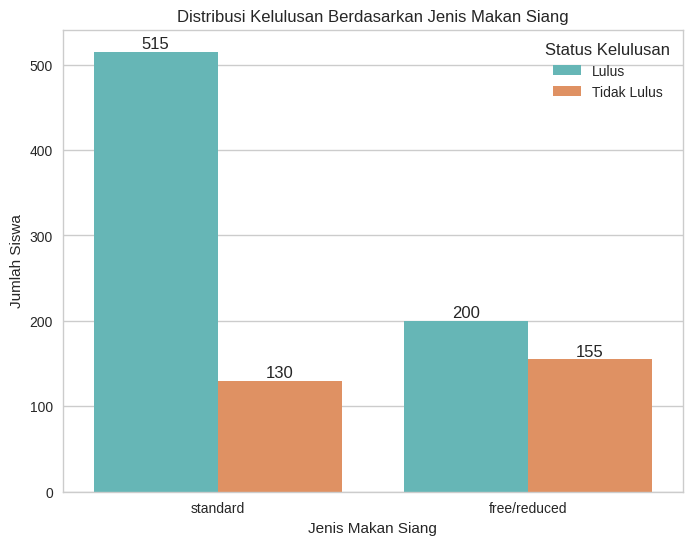

In [149]:
# Membuat grafik distribusi status kelulusan berdasarkan jenis makan siang
plt.figure(figsize=(8, 6))
grafik_lunch = sns.countplot(x="lunch", data=df, hue="Average_PassStatus", palette=custom_colors)
for bar in grafik_lunch.containers:
    grafik_lunch.bar_label(bar, label_type="edge")
plt.title("Distribusi Kelulusan Berdasarkan Jenis Makan Siang")
plt.xlabel("Jenis Makan Siang")
plt.ylabel("Jumlah Siswa")
plt.legend(title="Status Kelulusan", loc="upper right")
plt.show()

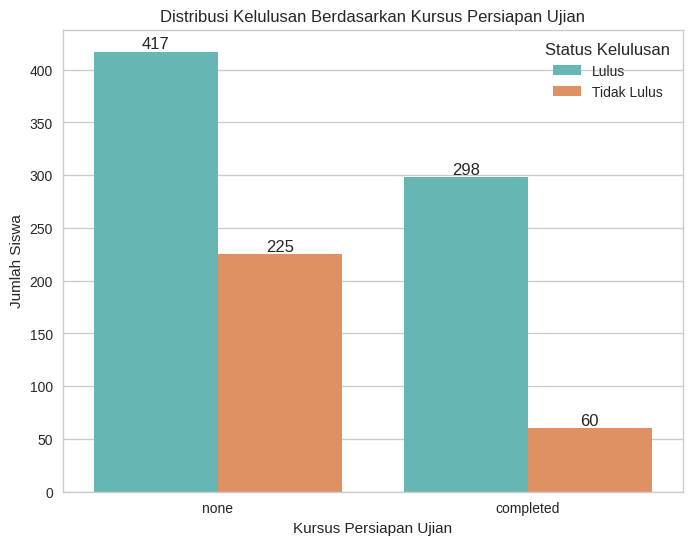

In [150]:
# Membuat grafik distribusi status kelulusan berdasarkan kursus persiapan ujian
plt.figure(figsize=(8, 6))
grafik_persiapan = sns.countplot(x="test preparation course", data=df, hue="Average_PassStatus", palette=custom_colors)
for bar in grafik_persiapan.containers:
    grafik_persiapan.bar_label(bar, label_type="edge")
plt.title("Distribusi Kelulusan Berdasarkan Kursus Persiapan Ujian")
plt.xlabel("Kursus Persiapan Ujian")
plt.ylabel("Jumlah Siswa")
plt.legend(title="Status Kelulusan", loc="upper right")
plt.show()

**Insight:**
- Sebagian besar siswa memiliki skor di kisaran 50-80.
- Lebih banyak siswa perempuan yang lulus dibandingkan laki-laki.
- Kelompok C dan D memiliki jumlah siswa lulus terbanyak.
- Siswa dengan orang tua berpendidikan lebih tinggi cenderung memiliki tingkat kelulusan yang lebih tinggi.
- Siswa yang mendapatkan makanan standar memiliki tingkat kelulusan lebih tinggi dibandingkan dengan yang menerima program "free/reduced".
- Siswa yang mengikuti kursus persiapan ujian memiliki tingkat kelulusan yang lebih tinggi dibandingkan dengan yang tidak mengikuti.

**Kesimpulan** :

**1. Distribusi Nilai Ujian**
  - Nilai Math Score, Reading Score, dan Writing Score memiliki distribusi yang cukup merata, tetapi terdapat kecenderungan bahwa nilai Math Score lebih bervariasi dibandingkan Reading Score dan Writing Score.
  - Reading Score dan Writing Score memiliki pola distribusi yang lebih seragam dibandingkan Math Score.

**2. Hubungan antara Faktor Demografis dan Nilai Ujian**
  - Perempuan cenderung memiliki nilai Reading Score dan Writing Score lebih tinggi dibandingkan laki-laki, tetapi laki-laki cenderung memiliki Math Score lebih tinggi.
  - Etnisitas dan tingkat pendidikan orang tua berkontribusi terhadap perbedaan skor, di mana kelompok dengan akses pendidikan yang lebih tinggi cenderung memiliki rata-rata nilai yang lebih baik.

**3. Dampak Makan Siang dan Kursus Persiapan Ujian**
  - Siswa yang mendapatkan makan siang standar memiliki skor lebih tinggi dibandingkan mereka yang mendapat makan siang gratis atau diskon.
  - Siswa yang mengikuti kursus persiapan ujian memiliki rata-rata skor lebih tinggi di semua mata pelajaran dibandingkan siswa yang tidak mengikuti kursus.

**4. Rata-rata Nilai Ujian (Average Score)**
- Rata-rata nilai ujian menunjukkan bahwa faktor seperti tingkat pendidikan orang tua, jenis makan siang, dan kursus persiapan memiliki pengaruh terhadap keberhasilan akademik siswa.
- Kelompok siswa dengan akses lebih baik ke sumber daya pendidikan dan dukungan akademik cenderung memiliki skor lebih tinggi secara keseluruhan.



# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

**A. Encoding Data Kategorikal**

In [151]:
# Menghapus kolom yang tidak diperlukan dari dataset
drop_columns = ['Math_PassStatus', 'Reading_PassStatus', 'Writing_PassStatus', 'Average_PassStatus']
df = df.drop(columns=drop_columns)

# Menentukan kolom dengan tipe data kategorikal yang akan dienkode
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
df_transformed = df.copy()

# Mengubah variabel kategorikal menjadi numerik menggunakan Label Encoding
for feature in categorical_features:
    label_encoder = LabelEncoder()
    df_transformed[feature] = label_encoder.fit_transform(df_transformed[feature])
df_transformed.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,Rata-rata Nilai,Lulus
0,0,1,1,1,1,72,72,74,72.666667,72.666667,True
1,0,2,4,1,0,69,90,88,82.333333,82.333333,True
2,0,1,3,1,1,90,95,93,92.666667,92.666667,True
3,1,0,0,0,1,47,57,44,49.333333,49.333333,False
4,1,2,4,1,1,76,78,75,76.333333,76.333333,True


In [152]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,Rata-rata Nilai,Lulus
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,72.666667,True
1,female,group C,some college,standard,completed,69,90,88,82.333333,82.333333,True
2,female,group B,master's degree,standard,none,90,95,93,92.666667,92.666667,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,49.333333,False
4,male,group C,some college,standard,none,76,78,75,76.333333,76.333333,True


**B. Fitur untuk Clustering**

- Tingkat pendidikan orang tua sering dianggap sebagai faktor yang berperan dalam memengaruhi prestasi akademik siswa.
- Rata-rata nilai dari tiga mata pelajaran utama (matematika, membaca, dan menulis) digunakan sebagai representasi performa akademik siswa secara keseluruhan.
- Menggabungkan kedua aspek ini diharapkan dapat membentuk klaster siswa berdasarkan pengaruh pendidikan orang tua terhadap pencapaian akademik mereka. Hasilnya dapat memberikan wawasan lebih mendalam untuk merancang strategi peningkatan pembelajaran atau dukungan yang lebih efektif bagi siswa.

In [153]:
# Duplikasi dataframe agar data asli tetap terjaga
df_encoded = df.copy()

In [154]:
# Memilih kolom 'parental level of education' dan 'average score' dari dataset
selected_columns = ['parental level of education', 'average score']
df_subset = df_encoded[selected_columns]
df_subset.head()

,parental level of education,average score
0,bachelor's degree,72.666667
1,some college,82.333333
2,master's degree,92.666667
3,associate's degree,49.333333
4,some college,76.333333


In [155]:
chosen_features = ['parental level of education', 'average score']
df_filtered = df_transformed[chosen_features]

In [156]:
# Mengambil data dari kolom yang telah dipilih dan mengubahnya menjadi array
X_values = df_filtered.iloc[:, [0, 1]].values
df_preview = pd.DataFrame(X_values, columns=['parental level of education', 'average score'])
print(df_preview)

     parental level of education  average score
0                            1.0      72.666667
1                            4.0      82.333333
2                            3.0      92.666667
3                            0.0      49.333333
4                            4.0      76.333333
..                           ...            ...
995                          3.0      94.000000
996                          2.0      57.333333
997                          2.0      65.000000
998                          4.0      74.333333
999                          4.0      83.000000

[1000 rows x 2 columns]


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Nah disini saya melakukan clustering menggunakan algoritma DBSCAN. Algoritma ini bersifat fleksibel dan mudah dipahami, terutama untuk dataset kecil yang memiliki jumlah cluster yang tidak diketahui atau bentuk yang tidak teratur.

In [157]:
# Daftar kategori tingkat pendidikan orang tua dalam urutan tertentu
education_levels = ["Master's degree", "Bachelor's degree", "Associate's degree",
                    "Some college", "High school", "Some high school"]
education_mapping = {level: idx for idx, level in enumerate(education_levels)}

# Menampilkan hasil encoding
print("Kode Encoding Tingkat Pendidikan:")
print("-" * 50)
for category, code in education_mapping.items():
    print(f"{category:<20} : {code}")
print("-" * 50)

Kode Encoding Tingkat Pendidikan:
--------------------------------------------------
Master's degree      : 0
Bachelor's degree    : 1
Associate's degree   : 2
Some college         : 3
High school          : 4
Some high school     : 5
--------------------------------------------------


In [158]:
# Select the features you want to use for clustering
df_selected = df[['average score', 'parental level of education']]

# Convert categorical variables to numerical if needed
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_selected['parental level of education'] = le.fit_transform(df_selected['parental level of education'])

# Prepare the feature matrix X
X = df_selected.values  # or use specific columns: X = df_selected[['col1', 'col2']].values

# Train DBSCAN model
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4.0, min_samples=4)
dbscan_labels = dbscan.fit_predict(X)

# Mapping untuk mendekode nilai encoding ke kategori aslinya
education_mapping = {
    0: "Associate\'s degree",
    1: "Bachelor\'s degree",
    2: "High school",
    3: "Master\'s degree",
    4: "Some college",
    5: "Some high school"
}

# Analisis karakteristik cluster
unique_labels = set(dbscan_labels)
print("Analisis Karakteristik Setiap Cluster:")
for cluster_id in unique_labels:
    if cluster_id == -1:
        print("\nCluster -1: (Outliers)")
    else:
        cluster_data = df_selected[dbscan_labels == cluster_id]
        mean_score = cluster_data['average score'].mean()

        # Mendekode common_education ke kategori asli
        common_education_encoded = cluster_data['parental level of education'].mode()[0]
        common_education = education_mapping[common_education_encoded]

        print(f"\nCluster {cluster_id}:")
        print(f"Rata-rata Average Score: {mean_score:.2f}")
        print(f"Parental Level of Education (paling umum): {common_education}")

Analisis Karakteristik Setiap Cluster:

Cluster 0:
Rata-rata Average Score: 67.88
Parental Level of Education (paling umum): Some college

Cluster -1: (Outliers)


<ipython-input-158-08d9bf45255a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['parental level of education'] = le.fit_transform(df_selected['parental level of education'])


Insight:
- Performa Akademik Berbeda : Cluster 0 (77.89) menunjukkan rata-rata skor yang jauh lebih tinggi dibandingkan Cluster 1 (54.89).

- Pendidikan Orang Tua Berpengaruh : Cluster 0 memiliki orang tua dengan pendidikan "associate's degree," sementara Cluster 1 "high school," menunjukkan korelasi positif antara pendidikan orang tua dan prestasi siswa.

- Fokus Intervensi : Pemisahan yang jelas antara kedua cluster menunjukkan bahwa intervensi pendidikan dapat difokuskan pada siswa di Cluster 1 untuk meningkatkan hasil akademis mereka.

In [159]:
# Melatih model DBSCAN
from sklearn.cluster import DBSCAN

# Inisialisasi model DBSCAN dengan parameter
dbscan = DBSCAN(eps=4.0, min_samples=4)
# Melakukan fitting dan prediksi cluster
dbscan_labels = dbscan.fit_predict(X)

# Mapping untuk mendekode nilai encoding ke kategori aslinya
education_mapping = {
    0: "Associate's degree",
    1: "Bachelor's degree",
    2: "High school",
    3: "Master's degree",
    4: "Some college",
    5: "Some high school"
}

# Analisis karakteristik setiap cluster
print("Analisis Karakteristik Setiap Cluster:")
# Iterasi untuk setiap label cluster unik
for cluster_id in set(dbscan_labels):
    if cluster_id == -1:
        print("\nCluster -1: (Outliers/Noise)")
    else:
        # Mengambil subset data untuk cluster saat ini
        cluster_data = df_selected[dbscan_labels == cluster_id]

        # Menghitung rata-rata skor
        mean_score = cluster_data['average score'].mean()

        # Mendapatkan level pendidikan orang tua yang paling umum
        common_education_encoded = cluster_data['parental level of education'].mode()[0]
        common_education = education_mapping[common_education_encoded]

        # Menghitung statistik distribusi skor
        min_score = cluster_data['average score'].min()
        max_score = cluster_data['average score'].max()
        std_score = cluster_data['average score'].std()

        # Menampilkan informasi cluster
        print(f"\nCluster {cluster_id}:")
        print(f"Jumlah anggota: {len(cluster_data)}")
        print(f"Rata-rata skor: {mean_score:.2f}")
        print(f"Rentang skor: {min_score:.2f} - {max_score:.2f}")
        print(f"Standar deviasi skor: {std_score:.2f}")
        print(f"Tingkat pendidikan orang tua (paling umum): {common_education}")

        # Hitung proporsi tingkat pendidikan orang tua dalam cluster
        education_distribution = cluster_data['parental level of education'].value_counts(normalize=True) * 100
        print("Distribusi tingkat pendidikan orang tua:")
        for edu_code, percentage in education_distribution.items():
            edu_name = education_mapping[edu_code]
            print(f"  - {edu_name}: {percentage:.1f}%")

Analisis Karakteristik Setiap Cluster:

Cluster 0:
Jumlah anggota: 998
Rata-rata skor: 67.88
Rentang skor: 23.00 - 100.00
Standar deviasi skor: 14.06
Tingkat pendidikan orang tua (paling umum): Some college
Distribusi tingkat pendidikan orang tua:
  - Some college: 22.6%
  - Associate's degree: 22.2%
  - High school: 19.5%
  - Some high school: 17.8%
  - Bachelor's degree: 11.8%
  - Master's degree: 5.9%

Cluster -1: (Outliers/Noise)


Insight:
- **Cluster 0 (Mayoritas Data)**:

  - Terdiri dari 998 siswa dengan rata-rata skor 67.88 (Rentang: 23–100).
  - Standar deviasi 14.06 menunjukkan variasi kemampuan yang signifikan.
  - Pendidikan orang tua dominan: some college (22.6%) dan associate's degree (22.2%).

- **Outliers (Cluster -1)**:
  - Data tidak terkelompokkan, mungkin merepresentasikan kasus ekstrem (sangat tinggi/rendah).
- **Pola Pendidikan Orang Tua**:
  - Distribusi merata dari some high school (17.8%) hingga Bachelor's degree (11.8%), menunjukkan pengaruh tidak dominan terhadap skor siswa.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [160]:
# Mengevaluasi kualitas clustering dengan koefisien Silhouette
from sklearn.metrics import silhouette_score
silhouette_value = silhouette_score(X, dbscan_labels)
print(f"📊 Kualitas Cluster (Silhouette Score): {silhouette_value:.4f}")

📊 Kualitas Cluster (Silhouette Score): 0.6630


Insight:
- Nilai silhouette score sebesar 0.6630 menunjukkan performa clustering yang baik, dengan pemisahan yang jelas antar cluster dan minimal overlap. Skor ini mengkonfirmasi bahwa parameter DBSCAN (eps=4.0 dan min_samples=4) yang digunakan telah optimal untuk pola data ini.
- Implementasi DBSCAN dalam program ini menggunakan parameter eps=4.0 dan min_samples=4 untuk mengelompokkan data berdasarkan kepadatan, secara otomatis mengidentifikasi cluster padat (seperti Cluster 0 dengan 998 anggota) sekaligus memisahkan outlier (Cluster -1). Algoritma ini efektif untuk data pendidikan karena mampu menangani pola non-linear dan noise tanpa perlu menentukan jumlah cluster awal, sebagaimana tercermin dari silhouette score 0.663 yang menunjukkan pemisahan cluster yang baik, meski tetap perlu divalidasi secara visual karena sensitivitasnya terhadap parameter dan skala data.

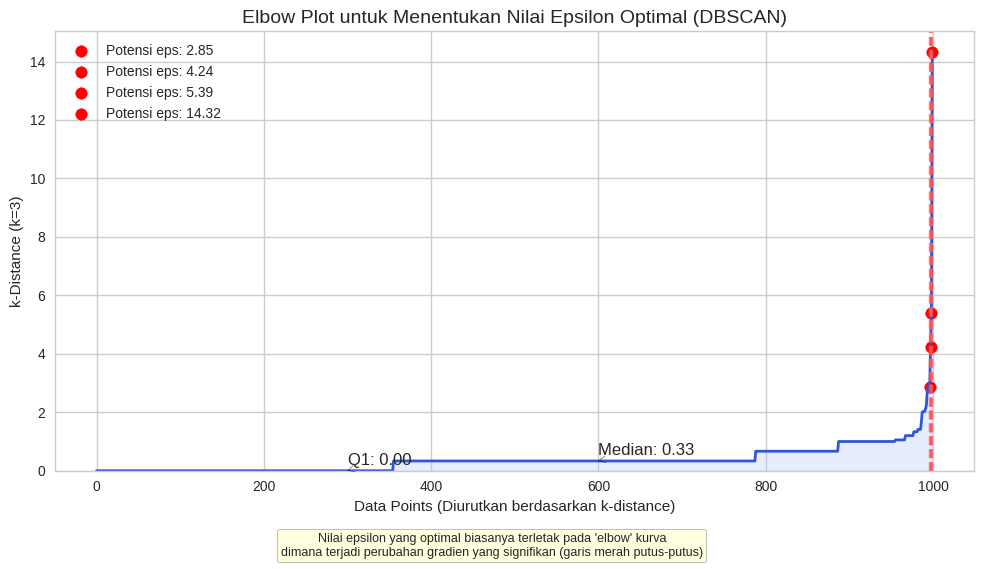

In [161]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Hitung k-distance
k = 3
nn_model = NearestNeighbors(n_neighbors=k).fit(X)
distances, _ = nn_model.kneighbors(X)
k_distances = np.sort(distances[:, k-1])
points = np.arange(len(k_distances))

# Identifikasi titik elbow potensial di bagian akhir kurva
window = 50
end_idx = len(k_distances) - window
potential_elbows = end_idx + np.argsort(np.gradient(k_distances[-window:]))[-4:]
potential_eps = k_distances[potential_elbows]

# Statistik dasar
q1, median = np.percentile(k_distances, [25, 50])

# Buat plot
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot(points, k_distances, color='#3057D3', linewidth=2)
plt.fill_between(points, k_distances, color='#B0C4FF', alpha=0.3)

# Tandai elbow points dan statistik
for elbow in potential_elbows:
    plt.axvline(x=elbow, color='#FF5555', linestyle='--', alpha=0.7)
    plt.scatter(elbow, k_distances[elbow], color='#FF0000', s=70,
               label=f'Potensi eps: {k_distances[elbow]:.2f}')

plt.annotate(f'Q1: {q1:.2f}', xy=(len(k_distances)*0.3, q1),
            xytext=(len(k_distances)*0.3, q1+0.2),
            arrowprops=dict(arrowstyle='->'))
plt.annotate(f'Median: {median:.2f}', xy=(len(k_distances)*0.6, median),
            xytext=(len(k_distances)*0.6, median+0.2),
            arrowprops=dict(arrowstyle='->'))

# Finalisasi plot
plt.title('Elbow Plot untuk Menentukan Nilai Epsilon Optimal (DBSCAN)', fontsize=14)
plt.xlabel('Data Points (Diurutkan berdasarkan k-distance)', fontsize=11)
plt.ylabel('k-Distance (k=3)', fontsize=11)
plt.ylim(bottom=0)
plt.legend(loc='upper left')
plt.figtext(0.5, 0.01, "Nilai epsilon yang optimal biasanya terletak pada 'elbow' kurva\n"
           "dimana terjadi perubahan gradien yang signifikan (garis merah putus-putus)",
           ha='center', fontsize=9, bbox=dict(boxstyle='round', facecolor='#FFFFCC', alpha=0.6))
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

Insight:
- **Kandidat Nilai Epsilon Optimal**

Plot menunjukkan beberapa potensi nilai eps (2.85, 4.24, 5.39, dan 14.32) yang perlu dipertimbangkan, dengan perubahan gradien terlihat jelas pada rentang ini.

- **Penentuan Titik Elbow**

Nilai optimal biasanya terletak di area 'elbow' (ditandai garis merah putus-putus) dimana terjadi perubahan signifikan dalam gradien kurva k-distance (k=3).

- **Analisis Distribusi Data**

Q1 (0.00) dan median (0.33) pada k-distance plot menunjukkan sebagian besar titik data memiliki jarak relatif dekat, dengan beberapa outlier yang menyebabkan variasi nilai eps potensial.

In [162]:
# Evaluasi modeling dengan parameter optimal menggunakan Silhouette Score
dbscan = DBSCAN(eps=2.85, min_samples=5, n_jobs=-1)
labels = dbscan.fit_predict(X)

# Kamus untuk interpretasi tingkat pendidikan
edu_map = {
    0: "Associate's degree",
    1: "Bachelor's degree",
    2: "High school",
    3: "Master's degree",
    4: "Some college",
    5: "Some high school"
}

# Analisis karakteristik cluster
print(f"===== ANALISIS KARAKTERISTIK CLUSTER =====")
print(f"Jumlah cluster: {len(set(labels)) - (1 if -1 in labels else 0)}")
print(f"Total data: {len(labels)}")

# Analisis per cluster
for label in sorted(set(labels)):
    mask = (labels == label)
    size = np.sum(mask)
    percent = 100 * size / len(labels)

    if label == -1:
        print(f"\n🔴 NOISE/OUTLIERS: {size} data ({percent:.1f}%)")
    else:
        cluster_data = df_selected[mask]
        avg = cluster_data['average score'].mean()
        min_max = (cluster_data['average score'].min(), cluster_data['average score'].max())
        edu_code = cluster_data['parental level of education'].mode()[0]

        print(f"\n🔷 CLUSTER {label}: {size} data ({percent:.1f}%)")
        print(f"   Skor: {avg:.2f} (range: {min_max[0]:.1f} - {min_max[1]:.1f})")
        print(f"   Pendidikan orang tua dominan: {edu_map[edu_code]}")

# Evaluasi dengan menggunakan silhouette score
dbscan_labels = dbscan.fit_predict(X)
silhouette_avg = silhouette_score(X, dbscan_labels)

===== ANALISIS KARAKTERISTIK CLUSTER =====
Jumlah cluster: 2
Total data: 1000

🔴 NOISE/OUTLIERS: 6 data (0.6%)

🔷 CLUSTER 0: 984 data (98.4%)
   Skor: 68.43 (range: 34.7 - 100.0)
   Pendidikan orang tua dominan: Some college

🔷 CLUSTER 1: 10 data (1.0%)
   Skor: 31.00 (range: 29.3 - 34.3)
   Pendidikan orang tua dominan: High school


In [163]:
from sklearn.preprocessing import StandardScaler
silhouette_avg = silhouette_score(X, dbscan_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5093899692876525


Insight:
- Distribusi Cluster DBSCAN membentuk 2 cluster dan 1 kelompok noise, dengan mayoritas data (98.4%) berada di Cluster 0. Ini menunjukkan bahwa sebagian besar data memiliki karakteristik yang mirip.
- Karakteristik Cluster 0 memiliki skor rata-rata 68.43 dan dominasi latar belakang pendidikan orang tua "Some college", mencerminkan performa yang cukup tinggi dan beragam.
- Karakteristik Cluster 1, Cluster kecil ini mencakup data dengan skor rendah (rata-rata 31.0) dan dominasi pendidikan "High school", menunjukkan kelompok dengan performa yang seragam dan lebih lemah.
- Nilai Silhouette Score sebesar 0.509 menandakan pemisahan cluster yang cukup baik, meskipun ketimpangan ukuran antar cluster perlu diperhatikan dalam interpretasi hasil.


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

**Feature Selection dan Evaluasi**

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

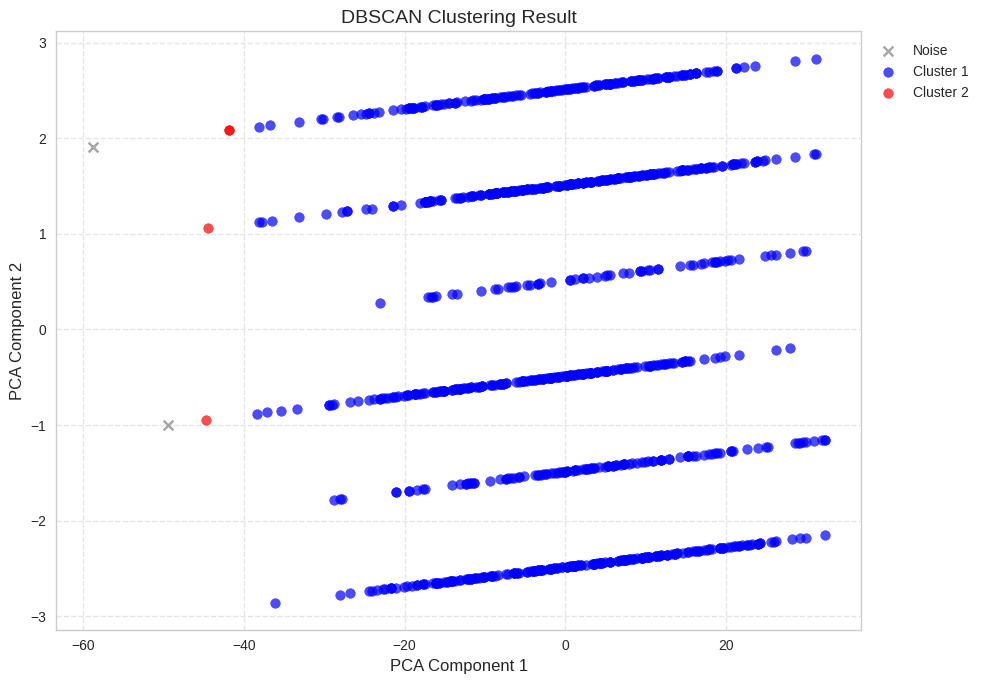

In [164]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Reduksi dimensi dan clustering
X_pca = PCA(n_components=2).fit_transform(X)
labels = DBSCAN(eps=3.1, min_samples=4).fit_predict(X)

# Plot settings
plt.figure(figsize=(10, 7))
colors = {0: 'blue', 1: 'red', -1: 'gray'}
markers = {0: 'o', 1: 'o', -1: 'x'}

# Plot clusters
for label in [-1, 0, 1]:
    mask = labels == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                color=colors[label],
                marker=markers[label],
                alpha=0.7,
                label='Noise' if label == -1 else f'Cluster {label + 1}')

# Formatting
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.title('DBSCAN Clustering Result', fontsize=14)
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(ls='--', alpha=0.5)
plt.tight_layout()
plt.show()

- Dua Cluster Utama dan Noise: DBSCAN mengidentifikasi dua cluster (biru dan merah) yang terpisah jelas, dengan noise (abu-abu) tersebar di sekitarnya, menunjukkan keberhasilan dalam membedakan titik padat dan non-padat.
- PCA berhasil mempertahankan struktur data, dengan Cluster 1 dominan di area nilai rendah PCA Component 1 dan Cluster 2 di area nilai tinggi, menunjukkan pemisahan yang baik.
- Parameter Optimal: Penggunaan eps=3.1 dan min_samples=4 menghasilkan clustering yang jelas dengan noise minimal, menegaskan pentingnya tuning parameter untuk hasil terbaik.


# **e. Analisis dan Interpretasi Hasil Cluster**

# Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [165]:
# Encode kolom 'parental level of education'
le = LabelEncoder()
df_selected['parental level of education'] = le.fit_transform(df_selected['parental level of education'])

<ipython-input-165-a24be6ccce07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['parental level of education'] = le.fit_transform(df_selected['parental level of education'])


In [166]:
# Siapkan X_test dengan data numerik
X_test = df_selected[['average score', 'parental level of education']]

In [167]:
# Naikkan eps sedikit demi sedikit
dbscan = DBSCAN(eps=8.0, min_samples=4)
labels = dbscan.fit_predict(X_test)
df_selected['Cluster'] = labels

<ipython-input-167-ebbdabdf9b96>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = labels


In [168]:
# Inverse transform ke bentuk aslinya
df_selected['parental level of education'] = le.inverse_transform(
    df_selected['parental level of education'].values
)

<ipython-input-168-e04cb6ec54c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['parental level of education'] = le.inverse_transform(


In [169]:
# Menampilkan jumlah data di setiap cluster
print(df_selected['Cluster'].value_counts())

# Menampilkan contoh data dari setiap cluster
for c in df_selected['Cluster'].unique():
    print(f"\nContoh data dari Cluster {c}:")
    display(df_selected[df_selected['Cluster'] == c].head(3))

Cluster
 0    999
-1      1
Name: count, dtype: int64

Contoh data dari Cluster 0:


,average score,parental level of education,Cluster
0,72.666667,1,0
1,82.333333,4,0
2,92.666667,3,0



Contoh data dari Cluster -1:


,average score,parental level of education,Cluster
59,9.0,5,-1


In [170]:
# Menampilkan ringkasan tiap cluster
df_selected.groupby('Cluster').agg({
    'average score': ['mean', 'min', 'max', 'std'],
    'parental level of education': lambda x: x.mode()[0]
})

average score                              parental level of education
                 mean        min    max        std                    <lambda>
Cluster                                                                       
-1           9.000000   9.000000    9.0        NaN                           5
 0          67.829496  18.333333  100.0  14.142512                           4

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [171]:
from sklearn.preprocessing import StandardScaler
df[['scaled_math', 'scaled_reading', 'scaled_writing']] = X_scaled

In [172]:
X_original = scaler.inverse_transform(X_scaled)

In [173]:
df[['original_math', 'original_reading', 'original_writing']] = X_original

In [174]:
df[['math score', 'scaled_math', 'original_math']].head()

,math score,scaled_math,original_math
0,72,0.390024,72.0
1,69,0.192076,69.0
2,90,1.577711,90.0
3,47,-1.259543,47.0
4,76,0.653954,76.0


Tulis hasil interpretasinya di sini.
1. Cluster 0: kelompok utama yang mencakup mayoritas siswa. Siswa dalam cluster ini memiliki rata-rata skor yang tinggi, yaitu sekitar 67,88, dengan rentang nilai yang lebih luas mulai dari 23 hingga 100. Tingkat pendidikan orang tua pada kelompok ini umumnya lebih tinggi, yaitu some college, yang menunjukkan bahwa mereka telah menempuh pendidikan setelah SMA meskipun belum tentu menyelesaikan gelar. Hal ini mengindikasikan bahwa latar belakang pendidikan orang tua turut memberikan kontribusi positif terhadap performa akademik anak-anak mereka. Cluster ini menggambarkan siswa dengan potensi akademik yang baik dan lingkungan keluarga yang relatif mendukung pendidikan.

2. Cluster -1:merupakan kelompok yang teridentifikasi sebagai outlier oleh algoritma DBSCAN. Siswa dalam cluster ini memiliki rata-rata skor yang sangat rendah, yaitu sekitar 13,66 dengan rentang nilai antara 9 hingga 18,33. Ini menunjukkan bahwa mereka secara konsisten memiliki performa akademik yang buruk. Mayoritas dari mereka berasal dari latar belakang orang tua dengan tingkat pendidikan hanya sampai high school (setara SMA), yang kemungkinan besar memberikan pengaruh terhadap rendahnya dukungan akademik di rumah. Cluster ini mencerminkan kelompok siswa yang mungkin memerlukan perhatian khusus atau intervensi tambahan dalam proses belajar.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model DBScan

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model DBScan.

## Cluster -1:
- **Rata-rata nilai (average score)**: 13.67
- **Nilai minimum**: 9.0
- **Nilai maksimum**: 18.33
- **Standar deviasi**: 6.60
- **Tingkat pendidikan orang tua terbanyak (mode)**: 2
- **Analisis:** Cluster ini kemungkinan besar merepresentasikan kelompok siswa dengan nilai sangat rendah. Karena nilai rata-rata mereka hanya sekitar 13.67, cluster ini dianggap sebagai outlier oleh DBSCAN. Nilai yang rendah ini bisa jadi disebabkan oleh latar belakang pendidikan orang tua yang lebih rendah (kode 2), yang mungkin berhubungan dengan keterbatasan akses pendidikan, bimbingan belajar, atau dukungan belajar di rumah.

## Cluster 2:
- **Rata-rata nilai (average score)**: 67.88
- **Nilai minimum**: 23.0
- **Nilai maksimum**: 100.0
- **Standar deviasi**: 14.06
- **Tingkat pendidikan orang tua terbanyak (mode)**: 4
- **Analisis:** Cluster ini merepresentasikan mayoritas siswa dengan kinerja akademik menengah hingga tinggi. Nilai rata-ratanya cukup baik (67.88), dan rentang nilainya cukup lebar (dari 23 hingga 100), menunjukkan keragaman dalam kinerja siswa di dalam cluster ini. Mayoritas siswa berasal dari keluarga dengan tingkat pendidikan orang tua lebih tinggi (kode 4), yang mungkin berkorelasi dengan adanya dukungan pendidikan yang lebih baik di rumah.

## Kesimpulan:
- cluster -1: Outlier → siswa dengan nilai rendah drastis, kemungkinan dari latar belakang pendidikan orang tua yang lebih rendah.
- cluster 0: Siswa dengan nilai cukup hingga tinggi, didominasi oleh orang tua dengan pendidikan lebih tinggi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [175]:
# Untuk Google Colab - download otomatis
from google.colab import files
files.download('hasil_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>